<h1>Analyzing Employee Exit Surveys</h1>

The following project is aimed to analyze the data from exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) Institute in Queensland, Australia. Both of the exit surveys can be found in public links:
- [DETE survey](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [TAFE survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

By the end of this project we will be able to understand why employees are leaving and if the reason for their resignation is correlated with how long they are in the company

<hr>

<h2>Importing libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

#### Changing pandas display options

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<hr>

<h2>Loading datasets</h2>

####  Loading DETE survey

In [3]:
rDete_survey = pd.read_csv(r'dete_survey.csv')

#### Loading TAFE survey

In [4]:
rTafe_survey = pd.read_csv(r'tafe_survey.csv')

<hr>

<h2>Initial exploration</h2>

#### DETE survey 

In [5]:
rDete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
rDete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [7]:
rDete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


####  TAFE survey

In [8]:
rTafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [9]:
rTafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [10]:
rTafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Below are some initial observations:

** DETE survey **:
- There are some values that are referred as "Not Stated" and not as NaN (null entries)
- Some columns are not needed to understand the reasons why employees are leaving the company (e.g. Skills, coach, separation type, ...)
- Many missing values

** TAFE survey **:
- Columns name are hard to read when displayed in a dataframe
- Some columns are not needed to understand the reasons why employees are leaving the company
- Many missing values
- Contains columns that have the same information as the DETE survey, but with a different column name (e.g. "Cease Date" and "CESSATION YEAR")

<hr>

<h2>Data Manipulation</h2>

#### DETE survey

In [11]:
## Replace Not Stated values as Null entries
# To do that, we can simply import the csv again and set the
# na_values as "Not Stated"
rDete_survey = pd.read_csv(r'dete_survey.csv', 
                           na_values='Not Stated')

## Create copy of the original dataframe
tDete_survey = rDete_survey.copy()

## Filter columns (dropping unneccessary columns)
tDete_survey.drop(tDete_survey.columns[28:49], 
                  axis=1, inplace=True)

## Renaming columns
# Removing whitespaces from the end of the strings, 
# replacing spaces with underscores and changing 
# letters to lowercase
tDete_survey.columns = (tDete_survey.columns
                        .str.strip()
                        .str.replace(' ', '_')
                        .str.lower())

## The separationtype column has different entries for
# resignation, which is the only type of separation that 
# we need to analyze to reach our main objective.
print('Cleaning separtiontype column', end='...')
tDete_survey['separationtype'] = np.where(tDete_survey
                                          ['separationtype']
                                  .str.contains('Resignation'),
                                  'Resignation',
                                  tDete_survey['separationtype'])
print('Ok')

print('Filtering only Resignation type of separation', end='...')
filter = (tDete_survey['separationtype']=='Resignation')
tDete_survey = tDete_survey[filter]
print('Ok')

Cleaning separtiontype column...Ok
Filtering only Resignation type of separation...Ok


#### TAFE survey  

In [12]:
## Create copy of the original dataframe
tTafe_survey = rTafe_survey.copy()

## Filter columns (dropping unneccessary columns)
tTafe_survey.drop(tTafe_survey.columns[17:66],
                  axis=1, inplace=True)

## Renaming columns
# Mapping of renames
map_rename = {'Record ID': 'id',
              'CESSATION YEAR': 'cease_date',
              'Reason for ceasing employment': 'separationtype',
              'Gender. What is your Gender?': 'gender',
              'CurrentAge. Current Age': 'age',
              'Employment Type. Employment Type': 'employment_status',
              'Classification. Classification': 'position',
              'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

tTafe_survey.rename(map_rename, axis=1, inplace=True)

print('Filtering only Resignation type of separation', end='...')
filter = (tTafe_survey['separationtype']=='Resignation')
tTafe_survey = tTafe_survey[filter]
print('Ok')

Filtering only Resignation type of separation...Ok


<hr>

<h2>Data Verification</h2>

Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940

####  DETE survey

In [13]:
tDete_survey['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [14]:
## Extracting the year from the cease_date columns
extraction = (tDete_survey['cease_date']
              .str.split('/')).str[-1]
tDete_survey['cease_date'] = extraction

## Transforming to float type
tDete_survey['cease_date'] = (tDete_survey['cease_date'].
                              astype(np.float))

In [15]:
## Condition1: cease_date has a higher year than start date
# First, let's take off the null entries to see if there is
# any entry with cease_date is equal or higher than start date
take_off = tDete_survey[tDete_survey['cease_date'].notnull()&
                        tDete_survey['dete_start_date'].notnull()]
condition1 = (take_off['cease_date']>=
              take_off['dete_start_date'])

## Condition2: start date earlier than 1940
condition2 = (take_off['dete_start_date']>=1940)

print('condition1 unique entries:', condition1.unique())
print('condition2 unique entries:', condition2.unique())

condition1 unique entries: [ True]
condition2 unique entries: [ True]


####  TAFE survey

In [16]:
tTafe_survey['cease_date'].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

The years in both dataframes don't completely align:

- The TAFE survey dataframe contains some cease dates in 2009, but the DETE survey dataframe does not
- The TAFE survey dataframe also contains many more cease dates in 2010 than the DETE survey dataframe
- The DETE survey does not contain any observation with cease date greater than the start date
- The DETE survey does not contain any observation with start date earlier than 1940

<hr>

<h2>Feature Engineering</h2>

In this section, we create a new column for the DETE survey dataframe: institute_service column.

This column, similar to the one in the TAFE survey, gives the length of time the employee spent in their current workplace

In [17]:
tDete_survey['institute_service'] = (tDete_survey['cease_date'] - 
                                     tDete_survey['dete_start_date'])

<hr>

<h2>Identifying Dissatisfied Employees</h2>

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

- TAFE:
  - Contributing Factors. Dissatisfaction
  - Contributing Factors. Job Dissatisfaction
- DETE:
  - job_dissatisfaction
  - dissatisfaction_with_the_department
  - physical_work_environment
  - lack_of_recognition
  - lack_of_job_security
  - work_location
  - employment_conditions
  - work_life_balance
  - workload
  
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

####  TAFE survey

In [18]:
# Update the values in the contributing factors 
# columns to be either True, False, or NaN

def update_vals(row):
    if row == '-':
        return False
    elif pd.isnull(row):
        return np.nan
    else:
        return True
    
tTafe_survey['dissatisfied'] = (tTafe_survey[
    ['Contributing Factors. Dissatisfaction', 
     'Contributing Factors. Job Dissatisfaction']]
                    .applymap(update_vals)
                    .any(1, skipna=False))

#### DETE survey

In [19]:
tDete_survey['dissatisfied'] = tDete_survey[
    ['job_dissatisfaction','dissatisfaction_with_the_department',
     'physical_work_environment','lack_of_recognition', 
     'lack_of_job_security', 'work_location',
     'employment_conditions', 'work_life_balance',
     'workload']].any(1, skipna=False)

<hr>

<h2>Combining Data</h2>

In [20]:
## Add institute column so that we can track 
# where each observation came from
tDete_survey['institute'] = 'DETE'
tTafe_survey['institute'] = 'TAFE'

## Combine dataframe
tMaster = pd.concat([tDete_survey, tTafe_survey], 
                    ignore_index=True, axis=0)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [21]:
# Verify the number of non null values in each column
tMaster.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
employment_conditions                                                        311
ill_health                  

In [22]:
# Drop columns with less than 500 non null values
tMaster = tMaster.dropna(thresh = 500, axis =1).copy()

<hr>

<h2>Cleaning the Institute Service Column</h2>

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

In [30]:
tMaster['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [39]:
## Extract the years of service
tMaster['institute_service_cleaned'] = tMaster['institute_service'].astype(str).str.extract(r'(\d+)')

## Convert the new column to float type
tMaster['institute_service_cleaned'] = tMaster['institute_service_cleaned'].astype(np.float)

## Convert years of service to categorical data
def categorize(row):
    if row >= 11:
        return 'Veteran'
    elif 7 <= row < 11:
        return 'Established'
    elif 3 <= row < 7:
        return 'Experienced'
    elif pd.isnull(row):
        return np.nan
    else:
        return 'New'
    
## Categorize data
tMaster['service_categorical'] = tMaster['institute_service_cleaned'].map(categorize)

<hr>

<h2>Analysis</h2>

The combined dataframe has 0 nulls in the dissatisfied column
Treating the null values in the column with the mode...Ok


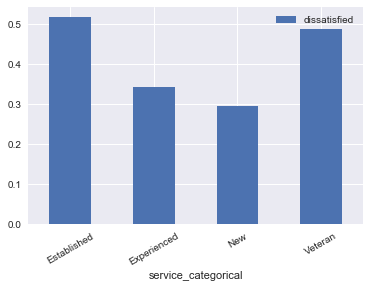

In [68]:
print('The combined dataframe has', tMaster['dissatisfied'].isnull().sum(), 'nulls in the dissatisfied column')

print('Treating the null values in the column with the mode', end='...')
mode = tMaster['dissatisfied'].mode()[0]
tMaster['dissatisfied'].fillna(mode, inplace=True)
print('Ok')

## calculate the percentage of dissatisfied in each service_cat group
to_plot = pd.pivot_table(tMaster,index='service_categorical', values='dissatisfied')

## Plot bar graph
to_plot.plot(kind='bar', rot=30)

- Initial analysis shows that employees Established employees (between 7 and 10 years of service) and Vetarans (+10 years of service) are more likley to resign due to some kind of dissatisfaction

<hr>